# Data Cleaning
Same initial script for both parts

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
books_df = pd.read_csv("data/books_data.csv")
books_df.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [14]:
# clean books_df
cleaned_books = books_df.copy()
cleaned_books = cleaned_books.drop(
    columns=["publisher", "image", "previewLink", "infoLink", "ratingsCount"]
)
# Check for duplicates in title
print(f"Unique Titles:", cleaned_books["Title"].is_unique)

cleaned_books["categories"].value_counts()

# clean the column; structured as ['category'], change to just category
replacement_map = {"[": "", "]": "", "'": "", ",": ""}
cleaned_books["categories"] = cleaned_books["categories"].replace(
    "[\[\]',]", "", regex=True
)
cleaned_books.shape

Unique Titles: True


(212404, 5)

In [19]:
category_counts = cleaned_books["categories"].value_counts()
# convert categories to lowercase
cleaned_books["categories"] = cleaned_books["categories"].str.lower()
# keep only categories with more than 50 books
categories_keep = category_counts[category_counts > 50].index

cleaned_books = cleaned_books[cleaned_books["categories"].isin(categories_keep)]

categories_keep

Index(['fiction', 'religion', 'history', 'juvenile fiction',
       'biography & autobiography', 'business & economics', 'computers',
       'social science', 'juvenile nonfiction', 'science',
       ...
       'folklore', 'adventure and adventurers',
       'encyclopedias and dictionaries', 'christmas stories', 'india',
       'dungeons and dragons (game)', 'aeronautics',
       'american wit and humor pictorial', 'buddhism', 'americans'],
      dtype='object', name='categories', length=136)

In [22]:
# Rename columns
rename_map = {
    "Title": "title",
    "description": "description",
    "authors": "authors",
    "publishedDate": "published_date",
    "categories": "categories",
}
cleaned_books.rename(columns=rename_map, inplace=True)
cleaned_books.head()

,title,description,authors,published_date,categories
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],1996,comics & graphic novels
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],2005-01-01,biography & autobiography
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],2000,religion
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],2005-02,fiction
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],1996,religion


In [34]:
# write out to cleaned_data
import os

if not os.path.exists("cleaned_data"):
    os.makedirs("cleaned_data")

print(cleaned_books.shape)

i = 0
while os.path.exists(f"cleaned_data/cleaned_books_{i}.csv"):
    i += 1

cleaned_books.to_csv(f"cleaned_data/cleaned_books_{i}.csv", index=False)

(141254, 5)


## Clean Ratings

In [23]:
ratings_df = pd.read_csv('data/Books_rating.csv')
ratings_df.head(3)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."


In [28]:
cleaned_ratings = ratings_df.copy().drop(
    columns=["Id", "User_id", "profileName", "review/time"]
)
# rename columns
rename_map = {
    "Title": "title",
    "Price": "price",
    "review/helpfulness": "review_helpfulness",
    "review/score": "review_score",
    "review/summary": "summary",
    "review/text": "text",
}
cleaned_ratings = cleaned_ratings.rename(columns=rename_map)
# Keep rows where title is in cleaned_books
cleaned_ratings = cleaned_ratings[cleaned_ratings["title"].isin(cleaned_books["title"])]
cleaned_ratings.reset_index(inplace=True, drop=True)
print(cleaned_ratings.shape)
# Drop the rows where text is nan or empty
cleaned_ratings = cleaned_ratings.dropna(subset=["text"])
cleaned_ratings = cleaned_ratings[cleaned_ratings["text"] != ""]
cleaned_ratings.reset_index(inplace=True, drop=True)
cleaned_ratings.shape

# Clean non-ascii characters
cleaned_ratings["text"] = (
    cleaned_ratings["text"].str.encode("ascii", "ignore").str.decode("ascii")
)
cleaned_ratings["text_length"] = cleaned_ratings["text"].apply(len)
cleaned_ratings["num_words"] = cleaned_ratings["text"].apply(lambda x: len(x.split()))

# Remove ratings that are less than 50 characters and less than 50 words
cleaned_ratings = cleaned_ratings[cleaned_ratings["text_length"] >= 50]
cleaned_ratings = cleaned_ratings[cleaned_ratings["num_words"] >= 50]
cleaned_ratings.reset_index(inplace=True, drop=True)
cleaned_ratings.shape

(2193374, 6)


(1623655, 8)

In [30]:
# export
import os
i = 0
while os.path.exists(f"cleaned_data/cleaned_ratings_{i}.csv"):
    i += 1
cleaned_ratings.to_csv(
    f"cleaned_data/cleaned_ratings_{i}.csv",
    index=False,
    columns=["title", "price", "review_helpfulness", "review_score", "summary", "text"],
)

# Clean and stem data further 

In [33]:
books_data = pd.read_csv('./cleaned_data/cleaned_books_0.csv')
books_data.shape

(141254, 5)

In [35]:
ratings_data = pd.read_csv("./cleaned_data/cleaned_ratings_0.csv")
ratings_data.shape

(1623655, 6)

In [36]:
# adapted from https://monkeylearn.com/blog/text-cleaning/
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from tqdm import tqdm

tqdm.pandas()

sub = r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"
stemmer = PorterStemmer()
lemmer = WordNetLemmatizer()

stopwords = stopwords.words("english")

# Import caching
from functools import cache

# Implement an indefinite length cache to speed up the process
@cache
def stem(word):
    return stemmer.stem(word)


def clean_text(sentence):
    # lowercase
    sentence = str(sentence)
    sentence = sentence.lower()

    # remove weird characters
    sentence = re.sub(sub, "", sentence)

    # remove stopwords
    # sentence = " ".join([word for word in sentence.split() if word not in (stopwords)])

    # stem words -> Try if a failure
    sentence = " ".join(
        [stem(word) for word in sentence.split(" ") if word not in (stopwords)]
    )
    return sentence

cleaned_text = ratings_data["text"].progress_map(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacksonbremen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 1623655/1623655 [15:20<00:00, 1763.02it/s]


In [37]:
import os

if not os.path.exists("cleaned_data"):
    os.makedirs("cleaned_data")

i = 0
while os.path.exists(f"cleaned_data/cleaned_ratings_{i}.csv"):
    i += 1
cleaned_text.to_csv(f"./cleaned_data/cleaned_text_stemmed_{i}", index=False)

# Main Analysis

In [1]:
import pandas as pd
books_data = pd.read_csv("./cleaned_data/cleaned_books.csv")
books_data.shape

(141254, 5)

In [7]:
ratings_data = pd.read_csv("./cleaned_data/cleaned_ratings.csv")
ratings_data["cleaned_text"] = cleaned_text["text"]

# Replace NaN with empty string
ratings_data["cleaned_text"] = ratings_data["cleaned_text"].fillna("")

ratings_data = ratings_data.merge(
    books_data[["title", "categories"]], on="title", how="left"
)

ratings_data.shape

(1623655, 8)

In [3]:
cleaned_text = pd.read_csv("./cleaned_data/cleaned_text_stemmed.csv")
cleaned_text.head(3)

,Unnamed: 0,text
0,0,juli strain fan collect photo 80 page worth n...
1,1,dont care much dr seuss read philip nel book c...
2,2,peopl becom book read child father man dr seus...


# Vectorize the Data
We keep words that appear in at least 0.5% of the documents

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Keep words that appear in more than 0.5% of the documents
# We tried bigrams, but this did not run at a rate performant enough to be useful
vectorizer = CountVectorizer(min_df=0.005, ngram_range=(1,1))
word_counts = vectorizer.fit_transform(ratings_data["cleaned_text"])

In [ ]:
# Write the vectorizer to a file and also word_counts for caching
import os
import pickle

if not os.path.exists("pickles"):
    os.makedirs("pickles")

pickle.dump(vectorizer, open("pickles/vectorizer.pkl", "wb"))
pickle.dump(word_counts, open("pickles/word_counts_mat.pkl", "wb"))

In [5]:
import pickle

# Load the vectorizer and word_counts
vectorizer = pickle.load(open("pickles/vectorizer.pkl", "rb"))
word_counts = pickle.load(open("pickles/word_counts_mat.pkl", "rb"))

In [6]:
word_counts

<1623655x2156 sparse matrix of type '<class 'numpy.int64'>'
	with 90919026 stored elements in Compressed Sparse Row format>

# Naive-Bayes Analysis

In [8]:
# import counter
import tqdm

word_frequencies = {}

# Get the unique categories
unique_categories = ratings_data["categories"].unique()

# For each category, get the word frequencies. use tqdm to show progress

for category in tqdm.tqdm(unique_categories):
    # Get the indices of the category
    category_indices = ratings_data[ratings_data["categories"] == category].index
    # Get the word counts of the category
    category_word_counts = word_counts[category_indices]
    # Sum the word counts
    category_word_counts_sum = category_word_counts.sum(axis=0)
    # Get the words and their counts
    words = vectorizer.get_feature_names_out()
    counts = category_word_counts_sum.T.flatten().A1
    # Create a Counter object
    word_frequencies[category] = dict(zip(words, counts))

word_frequencies

100%|██████████| 136/136 [00:17<00:00,  7.75it/s]


{'comics & graphic novels': {'10': 235,
  '100': 180,
  '11': 70,
  '12': 248,
  '13': 92,
  '14': 63,
  '15': 127,
  '16': 83,
  '1930': 51,
  '1960': 69,
  '19th': 39,
  '20': 150,
  '200': 34,
  '20th': 84,
  '25': 87,
  '30': 104,
  '40': 115,
  '50': 139,
  '60': 100,
  '70': 117,
  '80': 219,
  'abandon': 71,
  'abil': 306,
  'abl': 552,
  'absolut': 513,
  'absorb': 61,
  'absurd': 74,
  'abus': 144,
  'academ': 24,
  'accept': 206,
  'access': 89,
  'accid': 114,
  'accompani': 57,
  'accomplish': 82,
  'accord': 47,
  'account': 163,
  'accur': 129,
  'accus': 40,
  'achiev': 141,
  'acknowledg': 44,
  'across': 342,
  'act': 380,
  'action': 1199,
  'activ': 115,
  'actor': 56,
  'actual': 1297,
  'ad': 285,
  'adam': 119,
  'adapt': 170,
  'add': 376,
  'addict': 84,
  'addit': 295,
  'address': 77,
  'admir': 130,
  'admit': 267,
  'adopt': 67,
  'ador': 78,
  'adult': 416,
  'advanc': 90,
  'advantag': 63,
  'adventur': 698,
  'advic': 59,
  'advis': 34,
  'affair': 252,
 

In [9]:
word_frequencies.keys()

dict_keys(['comics & graphic novels', 'biography & autobiography', 'religion', 'fiction', 'social science', 'reference', 'juvenile nonfiction', 'technology & engineering', 'history', 'law', 'political science', 'health & fitness', 'cooking', 'philosophy', 'europe', 'sports & recreation', 'body mind & spirit', 'psychology', 'crafts & hobbies', 'language arts & disciplines', 'juvenile fiction', 'foreign language study', 'medical', 'architecture', 'art', 'family & relationships', 'gardening', 'games', 'science', 'computers', 'english language', 'performing arts', 'adventure stories', 'families', 'travel', 'business & economics', 'bible', 'great britain', 'humor', 'mathematics', 'poetry', 'education', 'music', 'drama', 'literary collections', 'american wit and humor', 'audiobooks', 'world war 1939-1945', 'nature', 'bibles', 'literary criticism', 'christian life', 'detective and mystery stories', 'authors english', 'design', 'antiques & collectibles', 'photography', 'self-help', 'american f

In [10]:
import math

# Given a word and a category, use bayes theorem to calculate the probability of the word being in the category
total_words = sum(sum(word_frequencies[x].values()) for x in word_frequencies)

# Create a dict of the number of times each word appears total
word_sums = word_counts.sum(axis=0).T
word_sums = word_sums.flatten().A1
word_sums = dict(zip(vectorizer.get_feature_names_out(), word_sums))

category_sums = {
    category: sum(word_frequencies[category].values()) for category in word_frequencies
}

# P(category | word) = (P(word | category) * P(category)) / P(word)


def bayes_theorem(word, category):
    if word not in word_frequencies[category]:
        return 0

    # P(word | category)
    p_word_category = word_frequencies[category][word] / category_sums[category]
    # P(category)
    p_category = category_sums[category] / total_words
    # P(word)
    p_word = word_sums[word] / total_words
    # P(category | word)
    p_category_word = (p_word_category * p_category) / p_word
    return p_category_word


# Function to return the probability of a category given a list of words
def get_category_probabilities(words, category):
    probabilities = []
    for word in words:
        probabilities.append(bayes_theorem(word, category))
    return probabilities


# Function to return the most likely category given a list of words
def get_most_likely_category(words, normalized=False):
    categories = list(word_frequencies.keys())
    probabilities = {
        category: sum(get_category_probabilities(words, category))
        for category in categories
    }

    # Normalize the probabilities by the percentage of all words in each category
    if normalized:
        for category in categories:
            probabilities[category] = (
                probabilities[category] * total_words
            ) / category_sums[category]

    return probabilities


def score_log_probs(words, category):
    # Logprior
    total = math.log(category_sums[category] / total_words)

    for word in words:
        if category not in category_sums or category not in word_frequencies:
            continue

        if word not in word_frequencies[category]:
            continue

        numerators = word_frequencies[category][word] + 1

        denominators = category_sums[category] + len(word_frequencies[category])

        loglikelihood = math.log(numerators / denominators)

        total += loglikelihood

    return total


def get_most_likely_category_log_probs(words, normalized=False):
    categories = list(word_frequencies.keys())
    probabilities = {
        category: score_log_probs(words, category) for category in categories
    }

    # Normalize the probabilities by the percentage of all words in each category
    if normalized:
        for category in categories:
            probabilities[category] = (
                probabilities[category] * total_words
            ) / category_sums[category]

    return probabilities

# Stratified Training Set for CatBoost

In [14]:
training_set2 = pd.DataFrame()
for category in unique_categories:
    category_samples = ratings_data[ratings_data["categories"] == category].sample(
        1000, random_state=42, replace=True
    )
    training_set2 = pd.concat([training_set2, category_samples])

In [15]:
import catboost as cb
from sklearn.model_selection import train_test_split

In [16]:
# Get word_counts in the same order as training_set2
word_counts2 = word_counts[training_set2.index]

X_categories2 = word_counts2
y_categories2 = training_set2["categories"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_categories2, y_categories2, test_size=0.2, random_state=42
)

In [ ]:
categories_model_2 = cb.CatBoostClassifier(
    iterations=1000,
    loss_function="MultiClass",
    verbose=True,
    save_snapshot=True,
    snapshot_interval=120,
)

categories_model_2.fit(
    X_train2, y_train2, eval_set=(X_test2, y_test2), verbose=False, plot=True
)

categories_model_2.save_model("categories_model_2")

In [17]:
import catboost as cb

# Load the model
categories_model_2 = cb.CatBoostClassifier()
categories_model_2.load_model("categories_model_2.cbm")

In [18]:
# Inspect feature importances
feature_importances = categories_model_2.get_feature_importance(prettified=True)
feature_importances = pd.DataFrame(feature_importances)
# Sort by Feature Id
feature_importances = feature_importances.sort_values(by="Feature Id")
# Reset the index
feature_importances.reset_index(drop=True, inplace=True)

# Rename the columns
feature_importances["Name"] = vectorizer.get_feature_names_out()


feature_importances.sort_values(by="Importances", ascending=False, inplace=True)
feature_importances.head(10)

,Feature Id,Importances,Name
905,1812,2.379643,hero
1392,310,1.744123,plain
1311,238,1.611945,old
583,1522,1.554317,due
323,1289,1.543829,china
1184,2063,1.288873,matter
128,1112,1.159519,approach
1667,559,1.127716,select
48,1040,1.105019,adapt
1372,293,1.099250,per


In [20]:
model = categories_model_2

# Function to plug into evaluate model function
def get_category_probabilities_catboost(words, normalize=False):
    # Normalize does nothing
    probs = model.predict_proba(vectorizer.transform([" ".join(words)]))[0]
    categories = model.classes_
    return {categories[i]: probs[i] for i in range(len(categories))}


In [21]:
def evaluate_model(row, model, normalize):
    # Return 10 points if the model predicts the correct category
    # 9 if it's the second most likely category, etc. If it's lower than 10 0
    words = row["cleaned_text"].split()

    # Get list of categories and their scores
    categories = sorted(
        model(words, normalize).items(), key=lambda x: x[1], reverse=True
    )

    # Get the index of the correct category
    correct_category = row["categories"]
    correct_index = [x[0] for x in categories].index(correct_category)

    # If the correct category is in the top 10, return 10 - the index
    if correct_index < 10:
        return 10 - correct_index
    else:
        return 0

In [22]:
# Generate a test set with 10,000 samples
# (should have the same uneven distribution as the original)
test_set = ratings_data.sample(10000, random_state=42)

# Use TQDM to show progress; apply for each row in the test_set
results = pd.DataFrame(
    columns=[
        "bayes",
        "bayes_normalized",
        "log_probs",
        "log_probs_normalized",
        "catboost",
    ]
)

results = pd.DataFrame(
    results,
    columns=[
        "bayes",
        "bayes_normalized",
        "log_probs",
        "log_probs_normalized",
        "catboost",
    ],
)


bayes = []
bayes_normalized = []
log_probs = []
log_probs_normalized = []
catboost = []

for index, row in tqdm.tqdm(test_set.iterrows(), total=len(test_set)):
    bayes.append(evaluate_model(row, get_most_likely_category, False))
    bayes_normalized.append(evaluate_model(row, get_most_likely_category, True))
    log_probs.append(evaluate_model(row, get_most_likely_category_log_probs, False))
    log_probs_normalized.append(
        evaluate_model(row, get_most_likely_category_log_probs, True)
    )
    catboost.append(evaluate_model(row, get_category_probabilities_catboost, False))

results["bayes"] = bayes
results["bayes_normalized"] = bayes_normalized
results["log_probs"] = log_probs
results["log_probs_normalized"] = log_probs_normalized
results["catboost"] = catboost

100%|██████████| 10000/10000 [08:01<00:00, 20.77it/s]


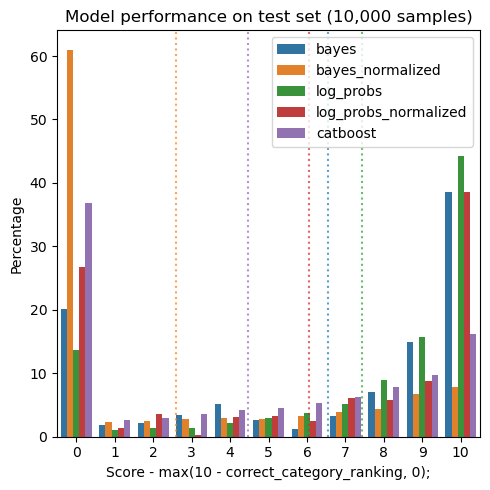

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

counts2 = pd.DataFrame(results.apply(lambda x: x.value_counts()).T.stack())
counts2.reset_index(inplace=True)
counts2.columns = ["model", "score", "count"]

counts2["perc"] = (counts2["count"] / len(test_set)) * 100

# Palate is bright colors
# Set size of axis to be 8, 8
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=counts2, x="score", y="perc", hue="model", palette="tab10", ax=ax)

# Set title to be "Model performance on test set"
ax.set_title("Model performance on test set (10,000 samples)")
# Set the y label to be "Percentage"
ax.set_ylabel("Percentage")
# Set the x label to be "Score"
ax.set_xlabel("Score - max(10 - correct_category_ranking, 0);")

# Draw the means of each model as a vertical line
for i, model in enumerate(results.columns):
    ax.axvline(
        results[model].mean(),
        color=f"C{i}",
        linestyle="dotted",
        # label=f"{model} mean",
        alpha=0.7,
    )

# Add a legend in the center
ax.legend()
# tight layout
plt.tight_layout()
# Save the plot
plt.savefig("full_model_performance1.png")

In [24]:
# Create a dataframe with columns bayes and rows score
counts = results.apply(lambda x: x.value_counts()).T.stack()
counts = counts.unstack(level=0).fillna(0)
# Normalize columns
counts = (counts / counts.sum()) * 100
# Print counts without the catboost column
counts.drop(columns="catboost")

# Create a row that is the sum of rows greater than zero
counts.loc["Rest"] = counts[counts.index > 0].sum()

# Drop rows that are greater than 0
counts = counts[counts.index.isin([0, "Rest"])]
# Rename rows
counts.rename(index={0: "Incorrect"}, inplace=True)
counts.rename(index={"Rest": "Correct"}, inplace=True)
counts.T

,Incorrect,Correct
bayes,20.14,79.86
bayes_normalized,61.00,39.00
log_probs,13.65,86.35
log_probs_normalized,26.74,73.26
catboost,36.77,63.23


# Check for Overfitting completely

In [25]:
# Check performance on each category in training set
# Get the unique categories by concatenating the categories column
results_2 = results.copy().reset_index()
test_set_2 = test_set.copy().reset_index()
# Add the categories to the results
results_2["categories"] = test_set_2["categories"]
results_2.drop(columns="index", inplace=True)
results_2

,bayes,bayes_normalized,log_probs,log_probs_normalized,catboost,categories
0,10,0,0,10,0,fiction
1,10,0,10,10,7,fiction
2,5,0,0,5,0,business & economics
3,2,0,7,2,4,young adult fiction
4,10,0,8,10,0,fiction
...,...,...,...,...,...,...
9995,8,0,9,8,7,biography & autobiography
9996,0,0,8,0,10,body mind & spirit
9997,10,0,0,10,0,fiction
9998,10,0,8,10,5,fiction


In [30]:
categories_mean = results_2.groupby("categories").mean()
# Count the number of times each category equals zero
nonzero_counts = categories_mean.apply(lambda x: x != 0).sum()
nonzero_percs = (nonzero_counts / len(categories_mean)) * 100
nonzero_percs = round(nonzero_percs, 2)
# Set column name to "Percentage of non-zero scores"
nonzero_percs.name = "Perc of categories correctly predicted 1+ times"
pd.DataFrame(nonzero_percs)

,Perc of categories correctly predicted 1+ times
bayes,32.26
bayes_normalized,97.58
log_probs,95.97
log_probs_normalized,10.48
catboost,97.58


# Look into the most important features for each category

In [32]:
importances = {}
for category in unique_categories:
    importances[category] = {}
    initial = math.log(category_sums[category] / total_words)

    for word in vectorizer.get_feature_names_out():
        if word not in word_frequencies[category]:
            continue

        numerators = word_frequencies[category][word] + 1

        denominators = category_sums[category] + len(word_frequencies[category])

        loglikelihood = math.log(numerators / denominators)

        importances[category][word] = initial + loglikelihood

importances_df = pd.DataFrame(importances)

# For each category, get the 10 most important words
most_important_words = {}
for category in unique_categories:
    most_important_words[category] = importances_df[category].sort_values(ascending=False).head(10)

In [33]:
importances_df

,comics & graphic novels,biography & autobiography,religion,fiction,social science,reference,juvenile nonfiction,technology & engineering,history,law,...,christmas stories,australia,church history,english literature,encyclopedias and dictionaries,business,cooking american,american wit and humor pictorial,crime,canada
10,-13.119530,-11.317576,-11.257767,-9.302427,-12.437487,-13.205048,-12.265212,-13.543730,-11.386488,-13.944287,...,-15.907314,-17.638676,-17.589956,-17.284222,-16.470130,-16.477003,-17.844059,-16.994610,-17.988045,-16.861897
100,-13.384865,-11.524730,-11.753309,-9.434704,-12.572859,-13.822772,-13.264257,-14.087345,-11.335270,-14.325998,...,-15.842776,-18.044141,-17.995421,-16.473292,-18.772715,-16.189321,-18.249524,-18.093222,-17.294898,-16.707747
11,-14.320682,-12.315605,-12.165841,-10.427263,-13.234565,-14.800756,-13.197882,-14.509618,-11.919070,-15.410624,...,-15.724993,-18.737289,-18.688569,-18.670517,-17.163277,-17.981081,-18.942671,-17.687757,-17.988045,-16.707747
12,-13.065909,-11.682191,-11.712964,-9.620402,-12.957655,-13.822772,-12.390014,-14.076296,-11.771885,-14.738530,...,-15.437311,-18.044141,-17.079131,-17.284222,-17.163277,-17.981081,-18.942671,-17.687757,-17.988045,-17.044219
13,-14.050762,-12.051487,-12.180681,-10.097804,-13.691323,-14.823745,-13.319687,-14.758514,-11.993375,-14.977760,...,-16.535923,-17.638676,-18.688569,-18.670517,-16.693273,-17.575615,-18.942671,-17.400075,-17.988045,-17.044219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
young,-11.807996,-9.314941,-10.456195,-7.298346,-11.041051,-12.634303,-10.411060,-13.481210,-10.109985,-13.852480,...,-14.149456,-15.646246,-15.980518,-14.981637,-15.939502,-17.287933,-17.333233,-16.221420,-15.125844,-14.915987
younger,-13.325866,-11.610176,-12.528849,-9.287035,-13.068244,-14.441811,-12.234988,-16.022206,-12.237044,-15.698306,...,-15.357268,-18.044141,-16.491344,-16.724607,-18.079568,-18.674228,-18.942671,-17.176931,-16.889433,-16.574215
your,-11.752488,-10.356742,-10.529278,-8.241001,-11.502488,-12.289680,-11.975727,-12.746513,-10.767738,-13.112214,...,-15.118857,-15.964700,-16.385984,-16.272621,-16.693273,-15.208492,-17.333233,-16.388474,-15.790821,-15.945606
youth,-13.579415,-11.084253,-11.762014,-9.504604,-12.673589,-14.474072,-12.888645,-15.753942,-11.823992,-15.698306,...,-16.130458,-18.737289,-18.688569,-17.284222,-16.826805,-17.981081,-18.249524,-18.093222,-16.735282,-17.960509


In [34]:
most_important_words["medicine"]

book      -12.267458
read      -13.602776
russian   -13.602776
soldier   -13.664908
war       -13.780290
like      -13.862734
one       -13.894482
medic     -14.005234
german    -14.070373
would     -14.099643
Name: medicine, dtype: float64

In [35]:
most_important_words["law"]

book      -9.503108
law      -10.051486
read     -10.602513
one      -10.843242
school   -11.000861
use      -11.157378
would    -11.203447
case     -11.255002
author   -11.261555
legal    -11.264847
Name: law, dtype: float64